In [1]:
import json
import numpy as np
import umap
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

from mpl_toolkits.mplot3d import Axes3D
import re
import plotly.graph_objects as go 

In [4]:
load_dotenv()

folder_path = os.getenv('path_goya_pics')

resnet50_vecs_munch = os.getenv('resnet50_vecs_goya')
vit_vecs_munch = os.getenv('vit_vecs_goya')
siglip_vecs_munch = os.getenv('siglip_vecs_goya')
clip_vecs_munch = os.getenv('clip_vecs_goya')
vgg19_vecs_munch = os.getenv('vgg19_vecs_goya')

In [5]:
with open(resnet50_vecs_munch, 'r', encoding='utf-8') as f:
    resnet50_dict = json.load(f)
    
with open(vit_vecs_munch, 'r', encoding='utf-8') as f:
    vit_dict = json.load(f)
    
with open(siglip_vecs_munch, 'r', encoding='utf-8') as f:
    siglip_dict = json.load(f)
    
with open(clip_vecs_munch, 'r', encoding='utf-8') as f:
    clip_dict = json.load(f)
    
with open(vgg19_vecs_munch, 'r', encoding='utf-8') as f:
    vgg19_dict = json.load(f)

In [6]:
len(vit_dict), len(resnet50_dict), len(siglip_dict), len(clip_dict), len(vgg19_dict)

(244, 244, 244, 244, 244)

In [9]:
# before psychosis
count = 0
for i in resnet50_dict:
    if i.split('_')[0] != 'yyyy':
        if int(i.split('_')[0]) >= 1819:
            count += 1

print(f'До 1819: {len(resnet50_dict) - count}')
print(f'После лечения: {count}')

До 1819: 210
После лечения: 34


## U-map для векторов resnet50

In [10]:
features_resnet50 = np.array([resnet50_dict[filename] for filename in resnet50_dict])
filenames_resnet50 = list(resnet50_dict.keys())

In [11]:
filenames_pics_resnet50 = [filename.split('/')[-1] for filename in filenames_resnet50]

In [12]:
colors = []
for filename in filenames_pics_resnet50:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors.append('blue')
    elif int(filename.split('_')[0]) < 1819:
        colors.append('blue')
    else:
        colors.append('red') # red - after treatment

In [16]:
umap_resnet50 = umap.UMAP(
            n_neighbors=2,
            n_components=17, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

#### Для всех картин в датасете

In [17]:
results = umap_resnet50.fit_transform(features_resnet50)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


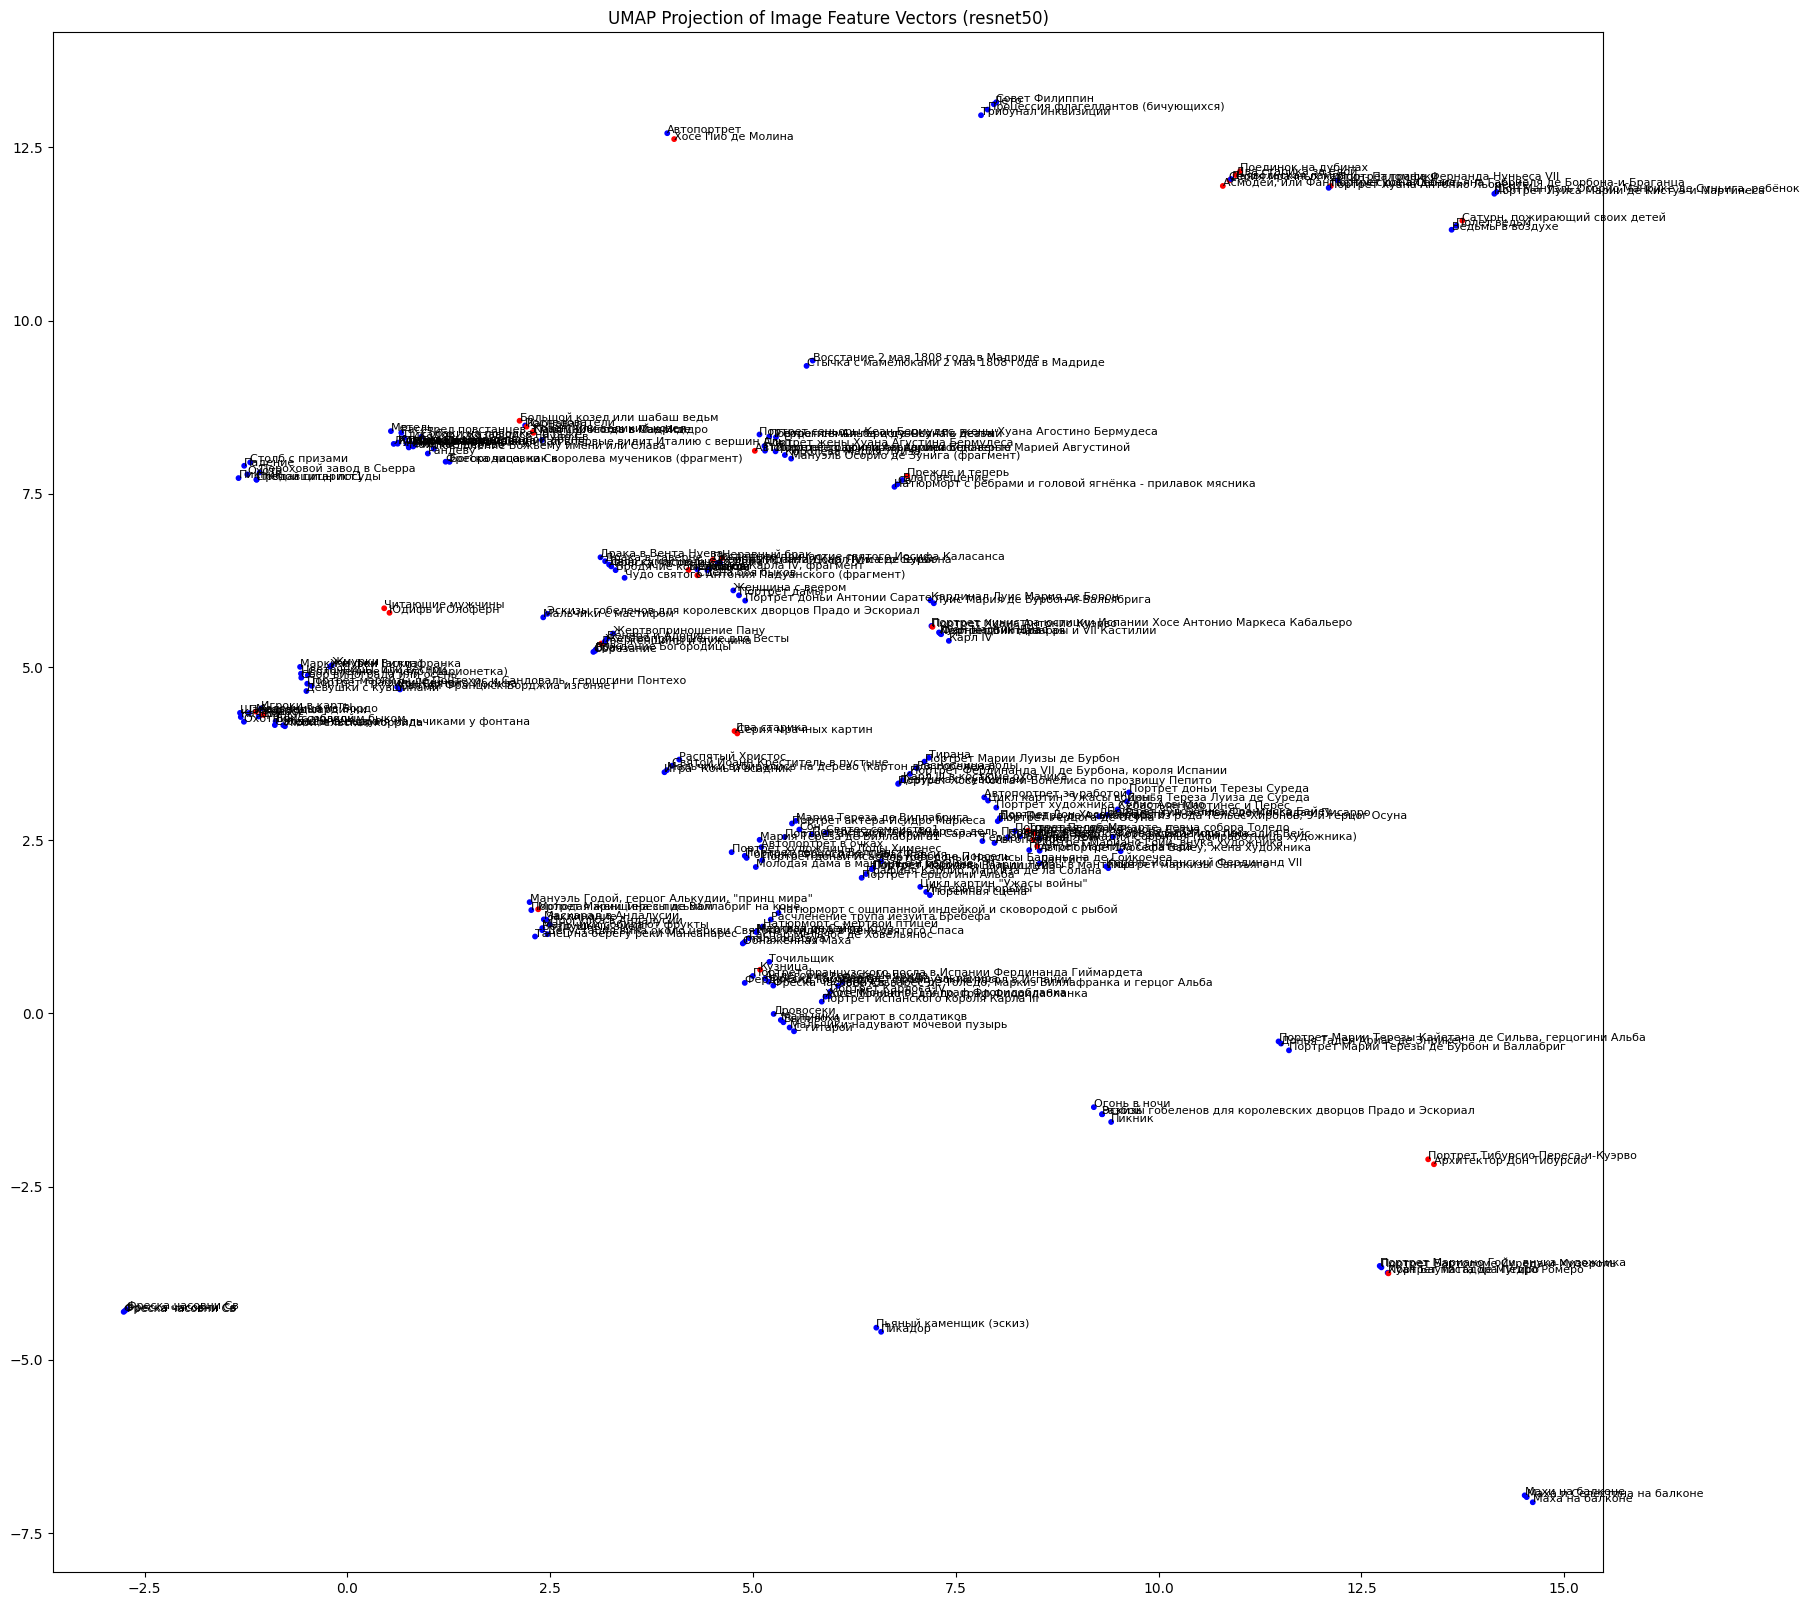

In [18]:
plt.figure(figsize=(20, 20))
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (resnet50)')

for i, filename in enumerate(filenames_resnet50):
    plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

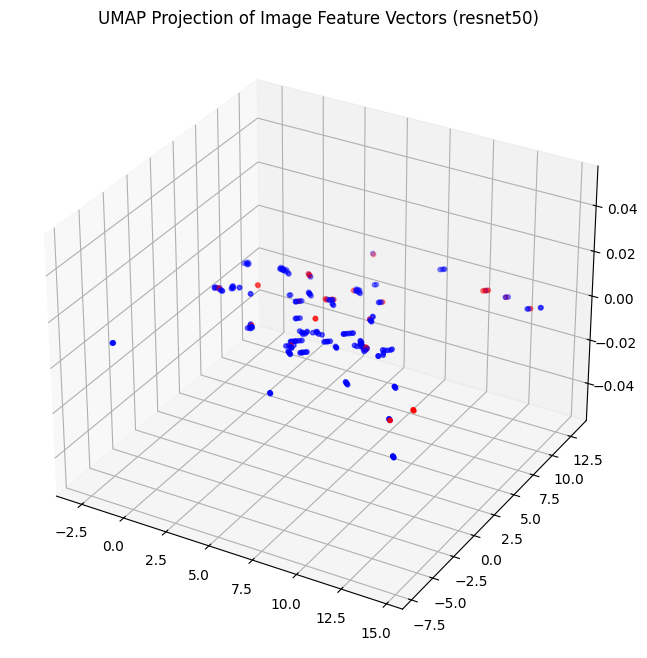

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (resnet50)')

plt.show()

In [20]:
fig = go.Figure(data=[go.Scatter3d(
    x=results[:, 0], y=results[:, 1], z=results[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (resnet50)",
)

fig.show()

#### Только для автопортретов

In [21]:
self_portraits_dict_resnet50 = {}

for key in resnet50_dict:
    if '_a_' in key:
        self_portraits_dict_resnet50[key] = resnet50_dict[key]

print(f'Количество авторпортретов: {len(self_portraits_dict_resnet50)}')

Количество авторпортретов: 7


In [22]:
count = 0
for i in self_portraits_dict_resnet50:
    if i.split('_')[0] != 'yyyy':
        if int(i.split('_')[0]) >= 1908:
            # print(i) 
            count += 1

print(f'До лечения в психиатрической больнице: {len(self_portraits_dict_resnet50) - count}')
print(f'После лечения: {count}')

До лечения в психиатрической больнице: 7
После лечения: 0


In [23]:
features_self_portrait = list(self_portraits_dict_resnet50.values())
features_self_portrait = np.array(features_self_portrait)

filenames_self_portrait = list(self_portraits_dict_resnet50.keys())

In [32]:
umap_resnet50 = umap.UMAP(
            n_neighbors=2,
            n_components=3, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

In [33]:
results = umap_resnet50.fit_transform(features_self_portrait)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [34]:
colors = []
for filename in filenames_self_portrait:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors.append('blue')
        elif int(filename.split('_')[0]) < 1819:
            colors.append('blue')
        else:
            colors.append('red')

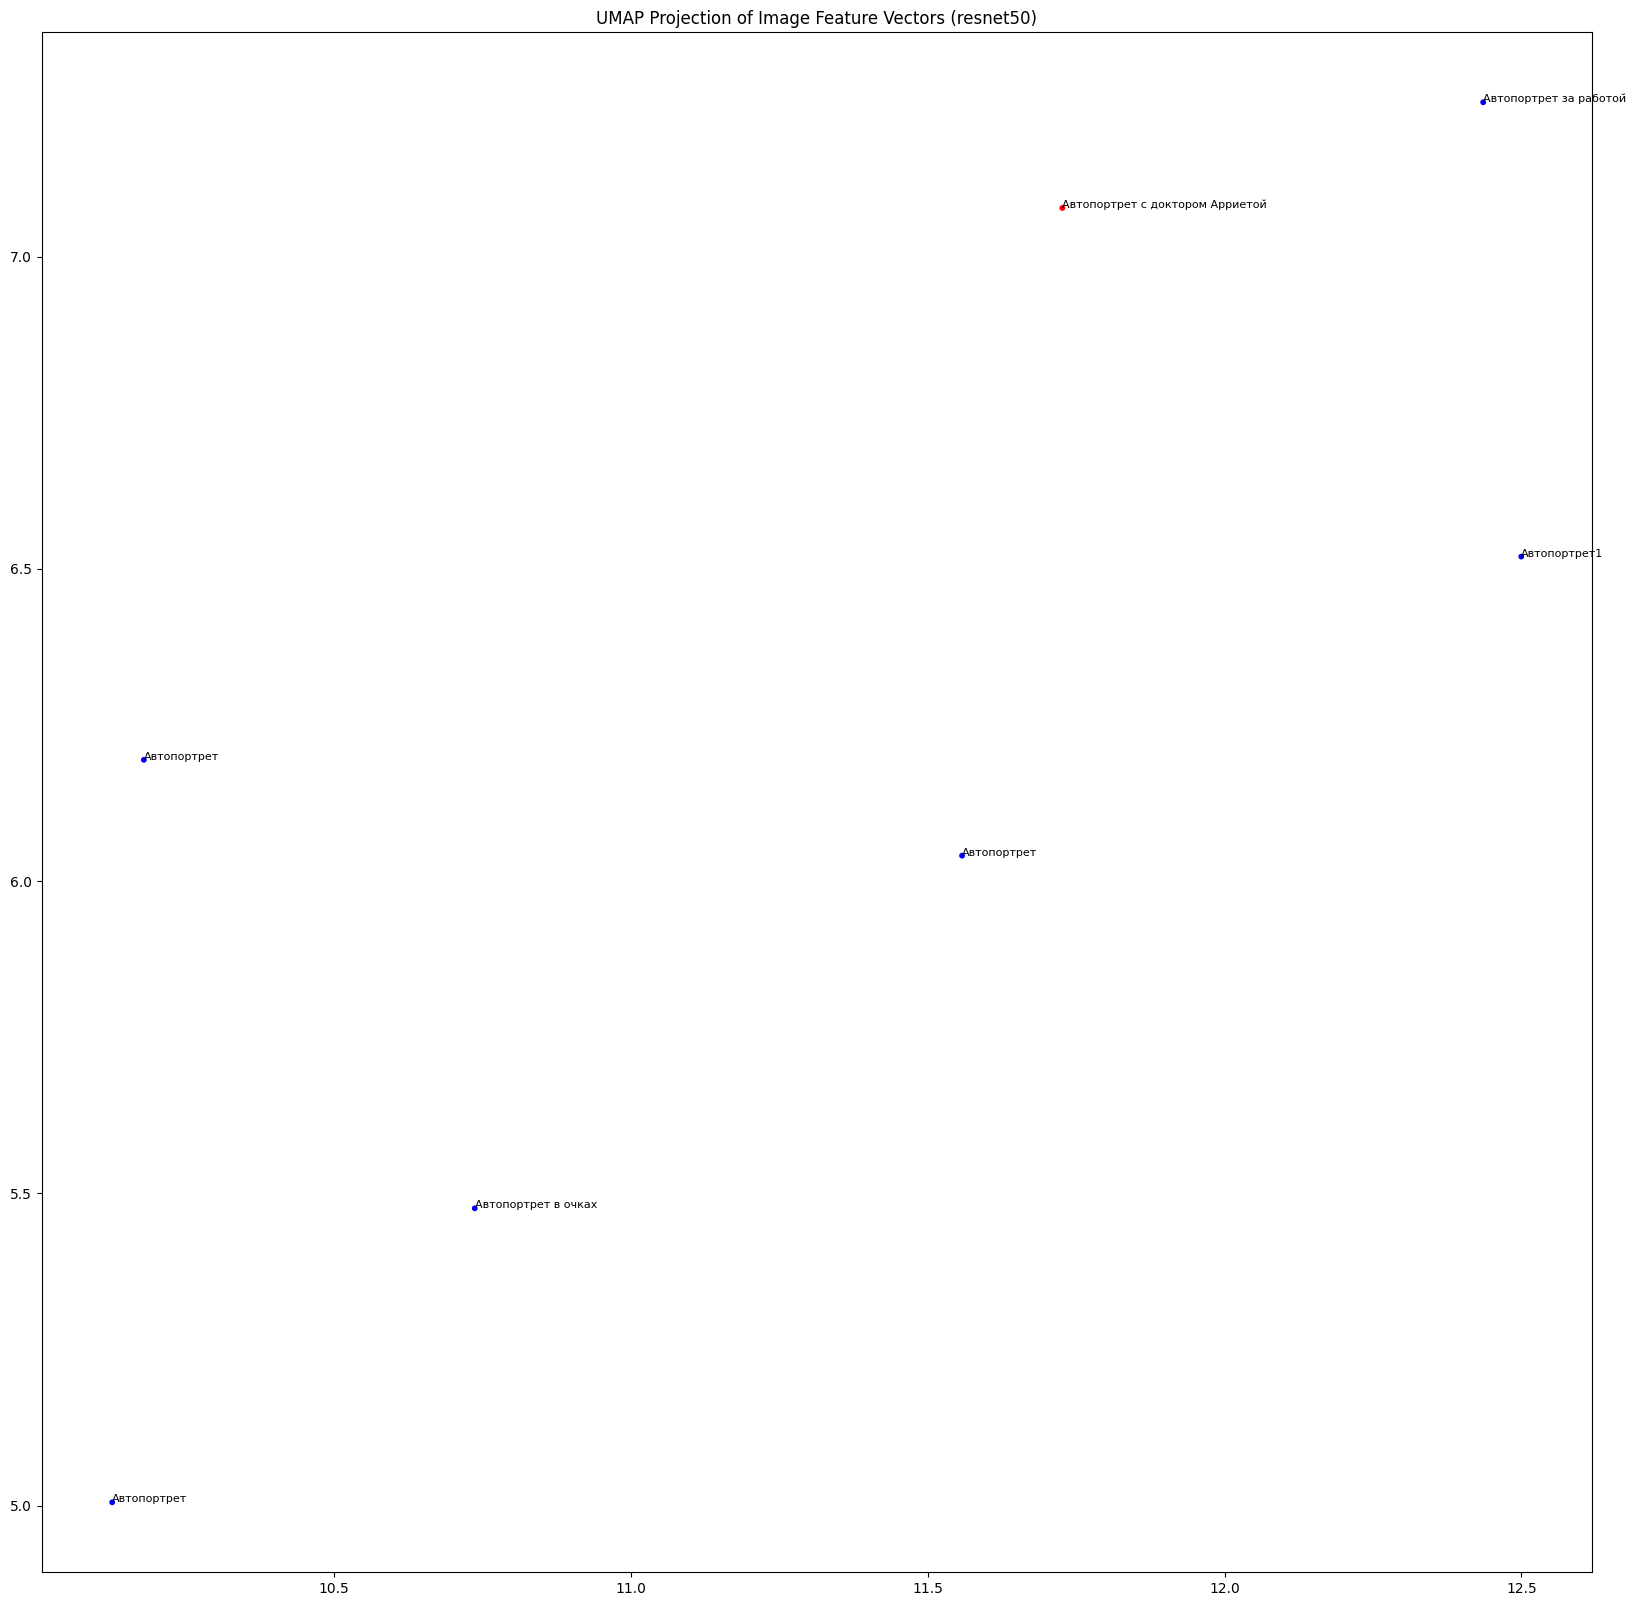

In [35]:
plt.figure(figsize=(20, 20))
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (resnet50)')

for i, filename in enumerate(filenames_self_portrait):
    plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

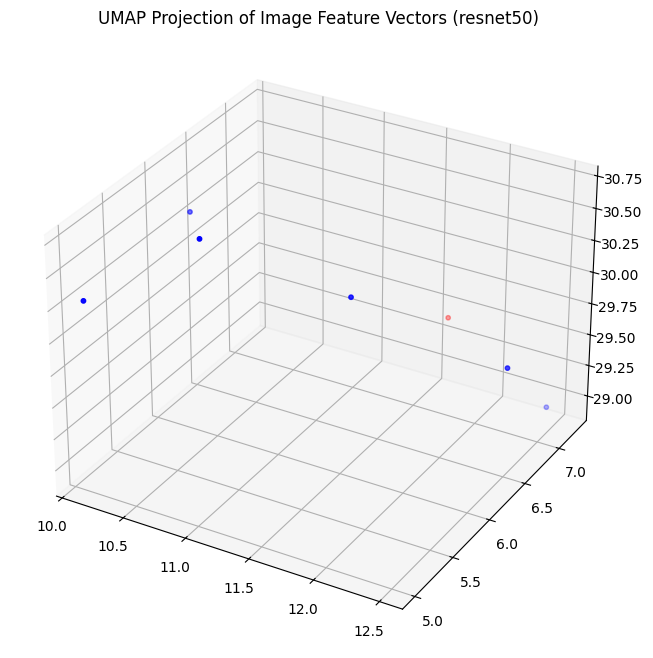

In [36]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(results[:, 0], results[:, 1], results[:, 2], s=10, c=colors, marker='o')
ax.set_title('UMAP Projection of Image Feature Vectors (resnet50)')

plt.show()

In [37]:
fig = go.Figure(data=[go.Scatter3d(
    x=results[:, 0], y=results[:, 1], z=results[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (resnet50)",
)

fig.show()

## U-map для векторов siglip

In [38]:
features_siglip = np.array([siglip_dict[filename] for filename in siglip_dict])
features_siglip = np.array([
    np.array(siglip_dict[filename]).reshape(-1)
    for filename in siglip_dict
])

filenames_siglip = list(siglip_dict.keys())
filenames_pics_siglip = [filename.split('/')[-1] for filename in filenames_siglip]

In [39]:
umap_siglip = umap.UMAP(
            n_neighbors=2,
            n_components=7,
            metric='cosine', 
            min_dist=0.35,
            spread=0.35,
            random_state=42
            )

In [40]:
results_siglip = umap_siglip.fit_transform(features_siglip)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



#### Для всех картин в датасете

In [43]:
colors_siglip = []
for filename in filenames_pics_siglip:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_siglip.append('blue')
    elif int(filename.split('_')[0]) < 1819:
        colors_siglip.append('blue')
    else:
        colors_siglip.append('red') # red - after treatment

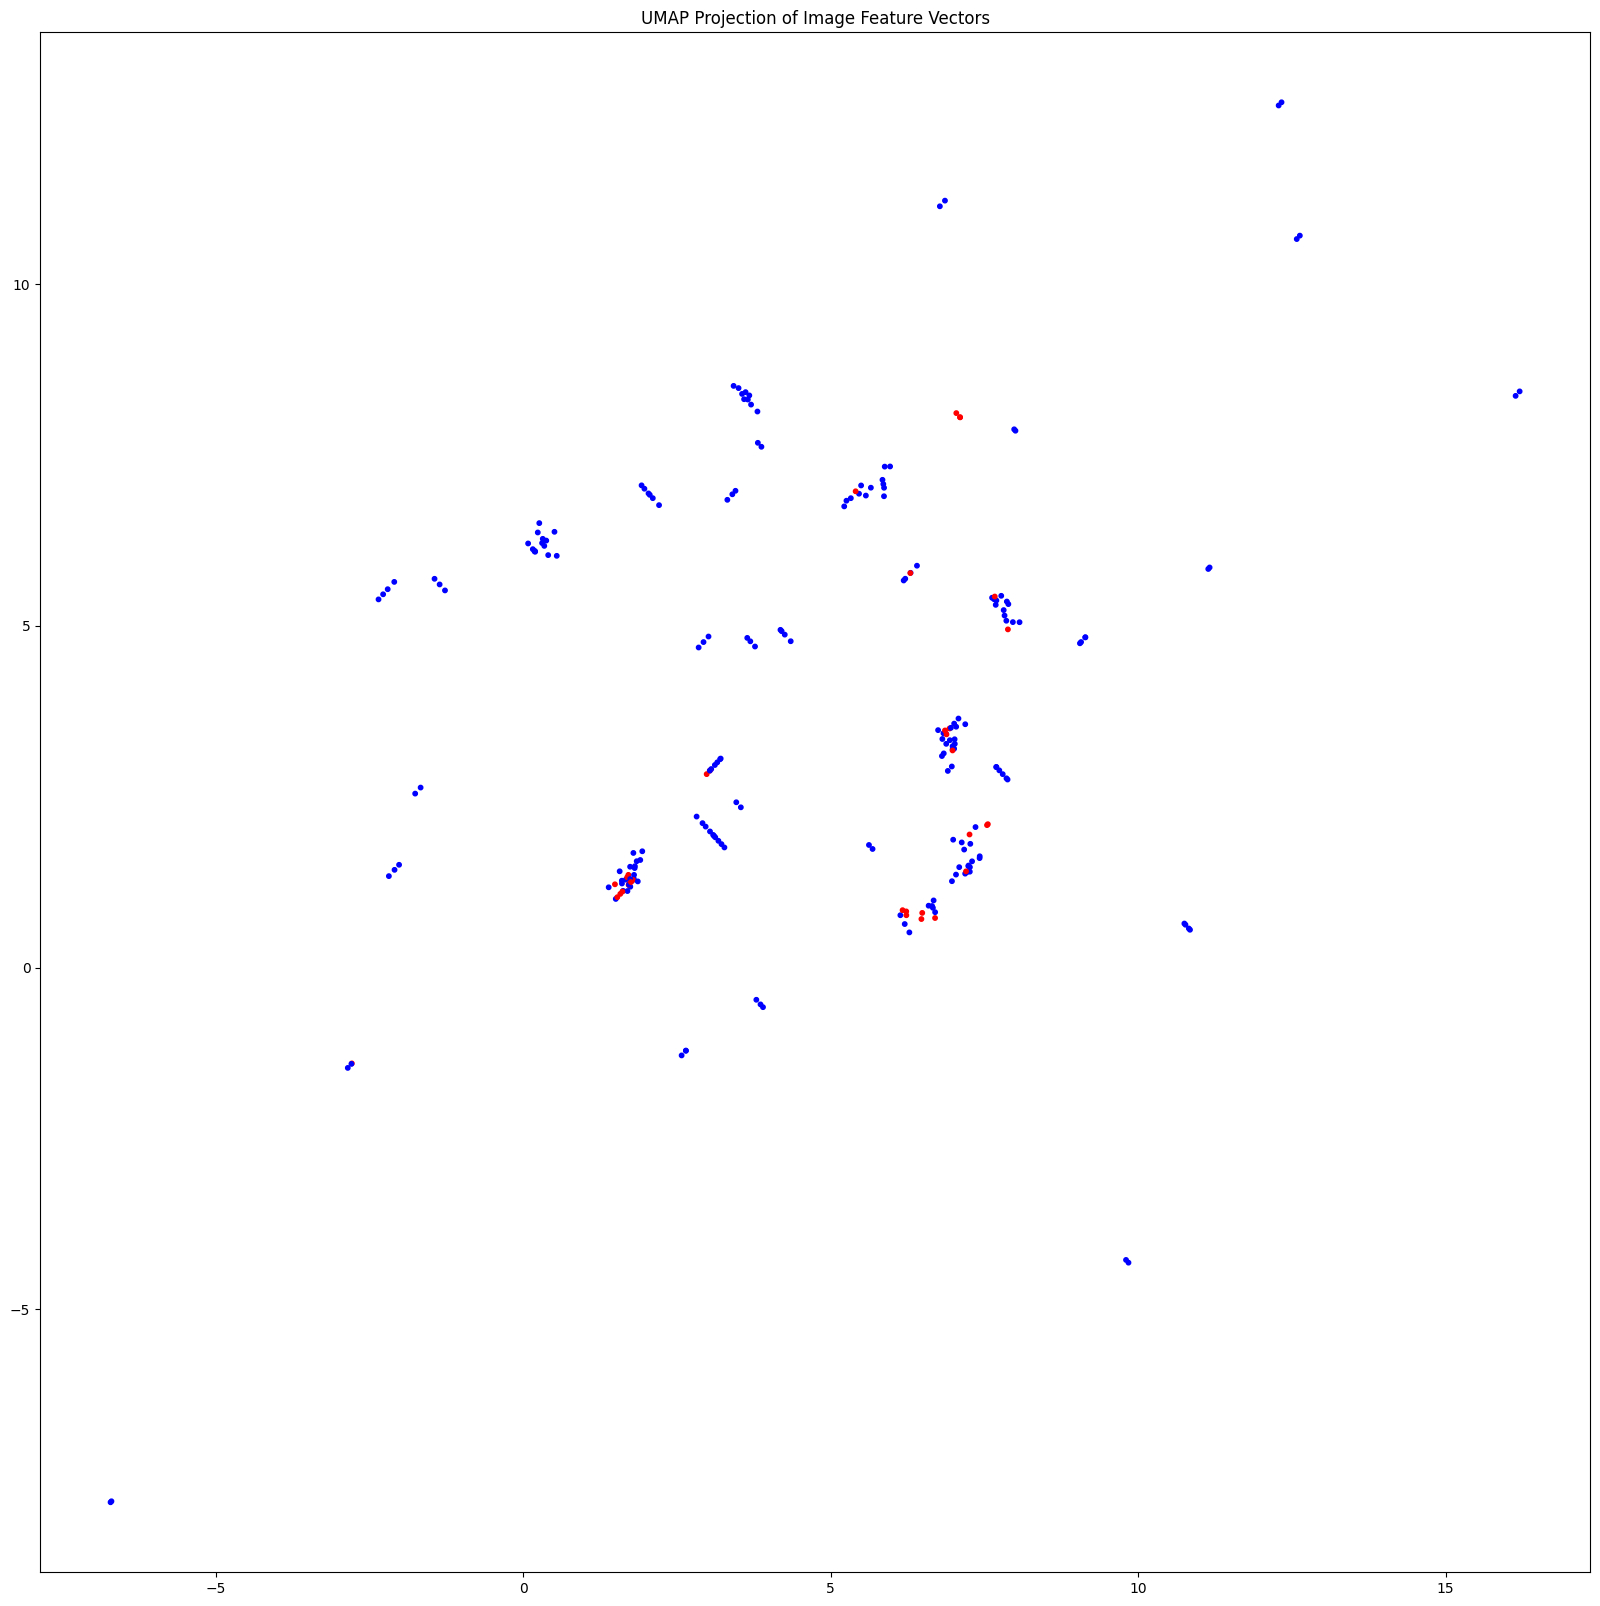

In [44]:
plt.figure(figsize=(20,20))
plt.scatter(results_siglip[:, 0], results_siglip[:, 1], s=10, c=colors_siglip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_siglip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_siglip[i, 0], results_siglip[i, 1]), fontsize=8)

plt.show()

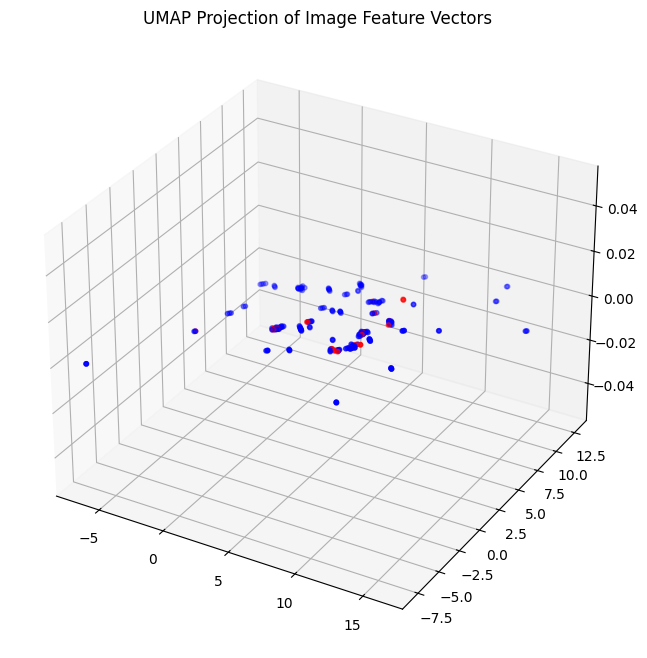

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_siglip[:, 0], results_siglip[:, 1], s=10, c=colors_siglip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

In [46]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_siglip[:, 0], y=results_siglip[:, 1], z=results_siglip[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_siglip, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (resnet50)",
)

fig.show()

#### Только для автопортретов

In [47]:
self_portraits_dict_siglip = {}

for key in siglip_dict:
    if '_a_' in key:
        self_portraits_dict_siglip[key] = siglip_dict[key]

print(f'Количество авторпортретов: {len(self_portraits_dict_siglip)}')

Количество авторпортретов: 7


In [48]:
features_self_portrait_siglip = list(self_portraits_dict_siglip.values())
features_self_portrait_siglip = np.array(features_self_portrait_siglip)
features_self_portrait_siglip = np.array([
    np.array(self_portraits_dict_siglip[filename]).reshape(-1)
    for filename in self_portraits_dict_siglip
])

filenames_self_portrait_siglip = list(self_portraits_dict_siglip.keys())

In [49]:
colors = []
for filename in filenames_self_portrait_siglip:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors.append('blue')
        elif int(filename.split('_')[0]) < 1819:
            colors.append('blue')
        else:
            colors.append('red')
            
print(len(colors))

7


In [51]:
umap_siglip = umap.UMAP(
            n_neighbors=2,
            n_components=4,
            metric='cosine', 
            min_dist=0.35,
            spread=0.35,
            random_state=42
            )

In [52]:
results_self_siglip = umap_siglip.fit_transform(features_self_portrait_siglip)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



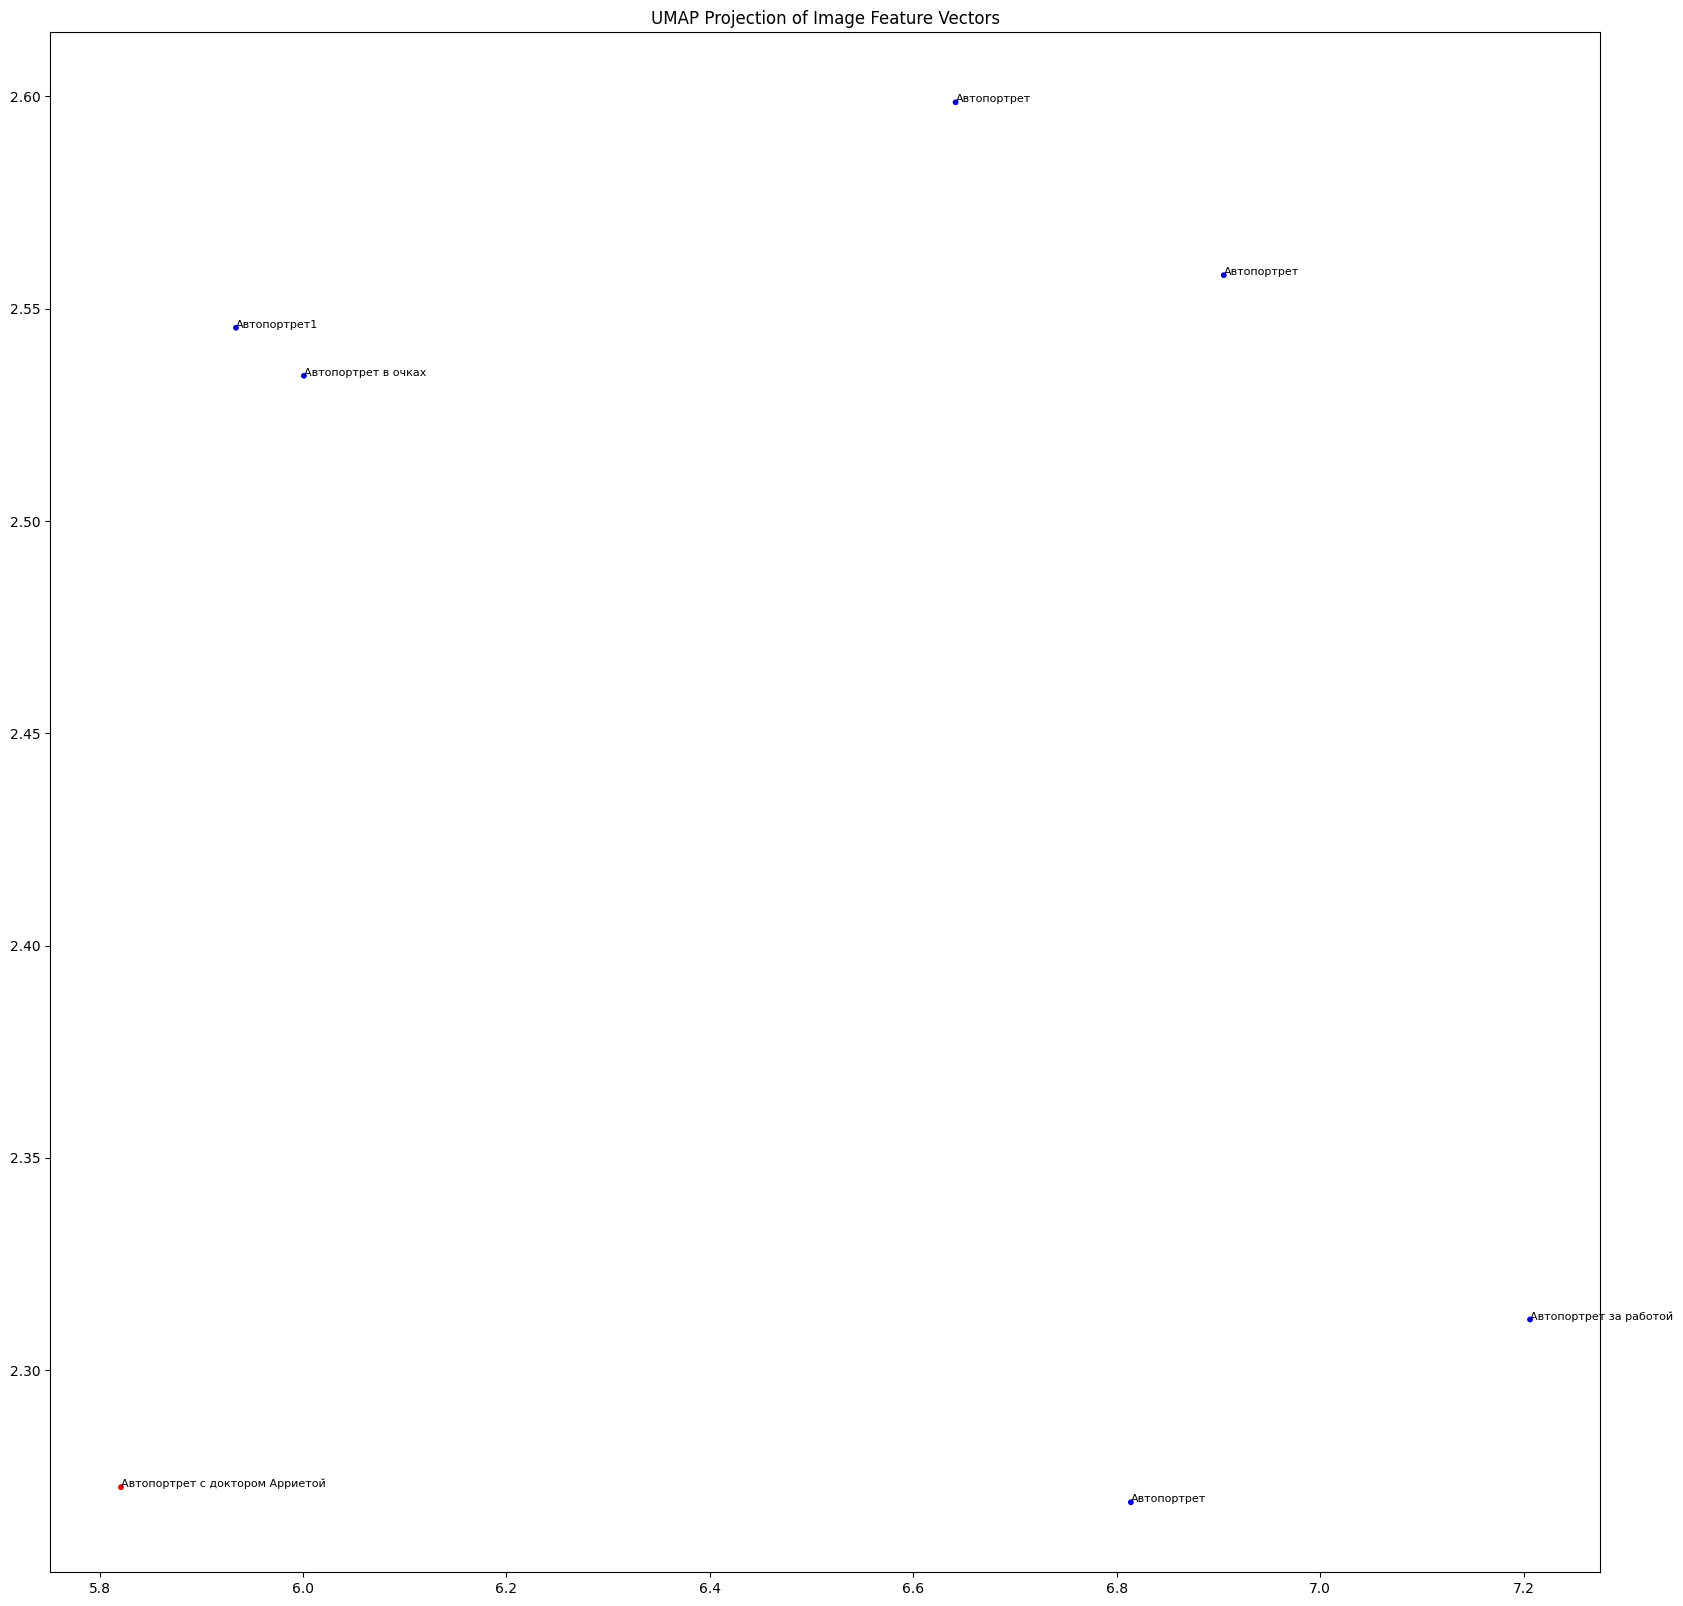

In [53]:
plt.figure(figsize=(20,20))
plt.scatter(results_self_siglip[:, 0], results_self_siglip[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

for i, filename in enumerate(filenames_self_portrait_siglip):
    plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_self_siglip[i, 0], results_self_siglip[i, 1]), fontsize=8)

plt.show()

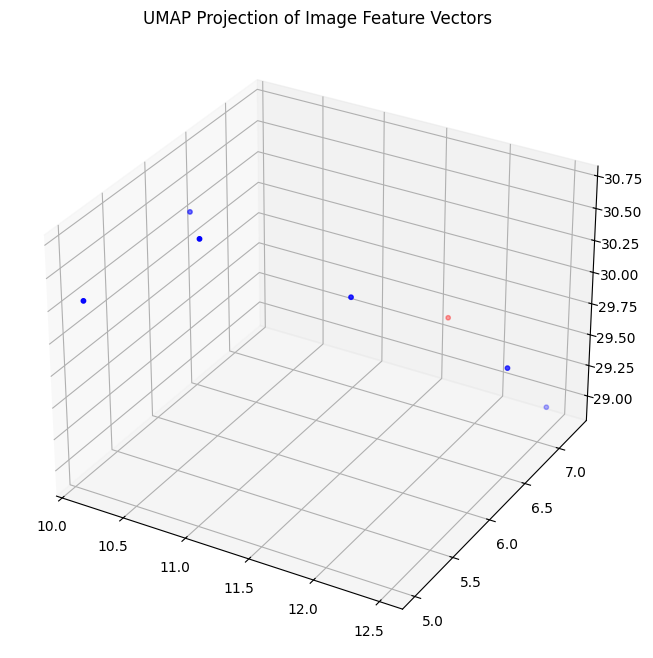

In [54]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(results[:, 0], results[:, 1], results[:, 2], s=10, c=colors, marker='o')
ax.set_title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_self_portrait):
#     ax.text(results[i, 0], results[i, 1], results[i, 2], ' '.join(filename.split('_')[4:]).split('.')[0], fontsize=8)

plt.show()

In [55]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_self_siglip[:, 0], y=results_self_siglip[:, 1], z=results_self_siglip[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_siglip, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (resnet50)",
)

fig.show()

## U-map для векторов ViT

In [56]:
features_vit = np.array([vit_dict[filename] for filename in vit_dict])
filenames_vit = list(vit_dict.keys())

In [57]:
filenames_pics_vit = [filename.split('/')[-1] for filename in filenames_vit]
print(len(filenames_pics_vit))

244


#### Для всех картин в датасете

In [58]:
umap_vit = umap.UMAP(
            n_neighbors=2,
            n_components=25, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

In [59]:
results_vit = umap_vit.fit_transform(features_vit)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [60]:
colors_vit = []
for filename in filenames_vit:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_vit.append('blue')
    elif int(filename.split('_')[0]) < 1819:
        colors_vit.append('blue')
    else:
        colors_vit.append('red') # red - after treatment

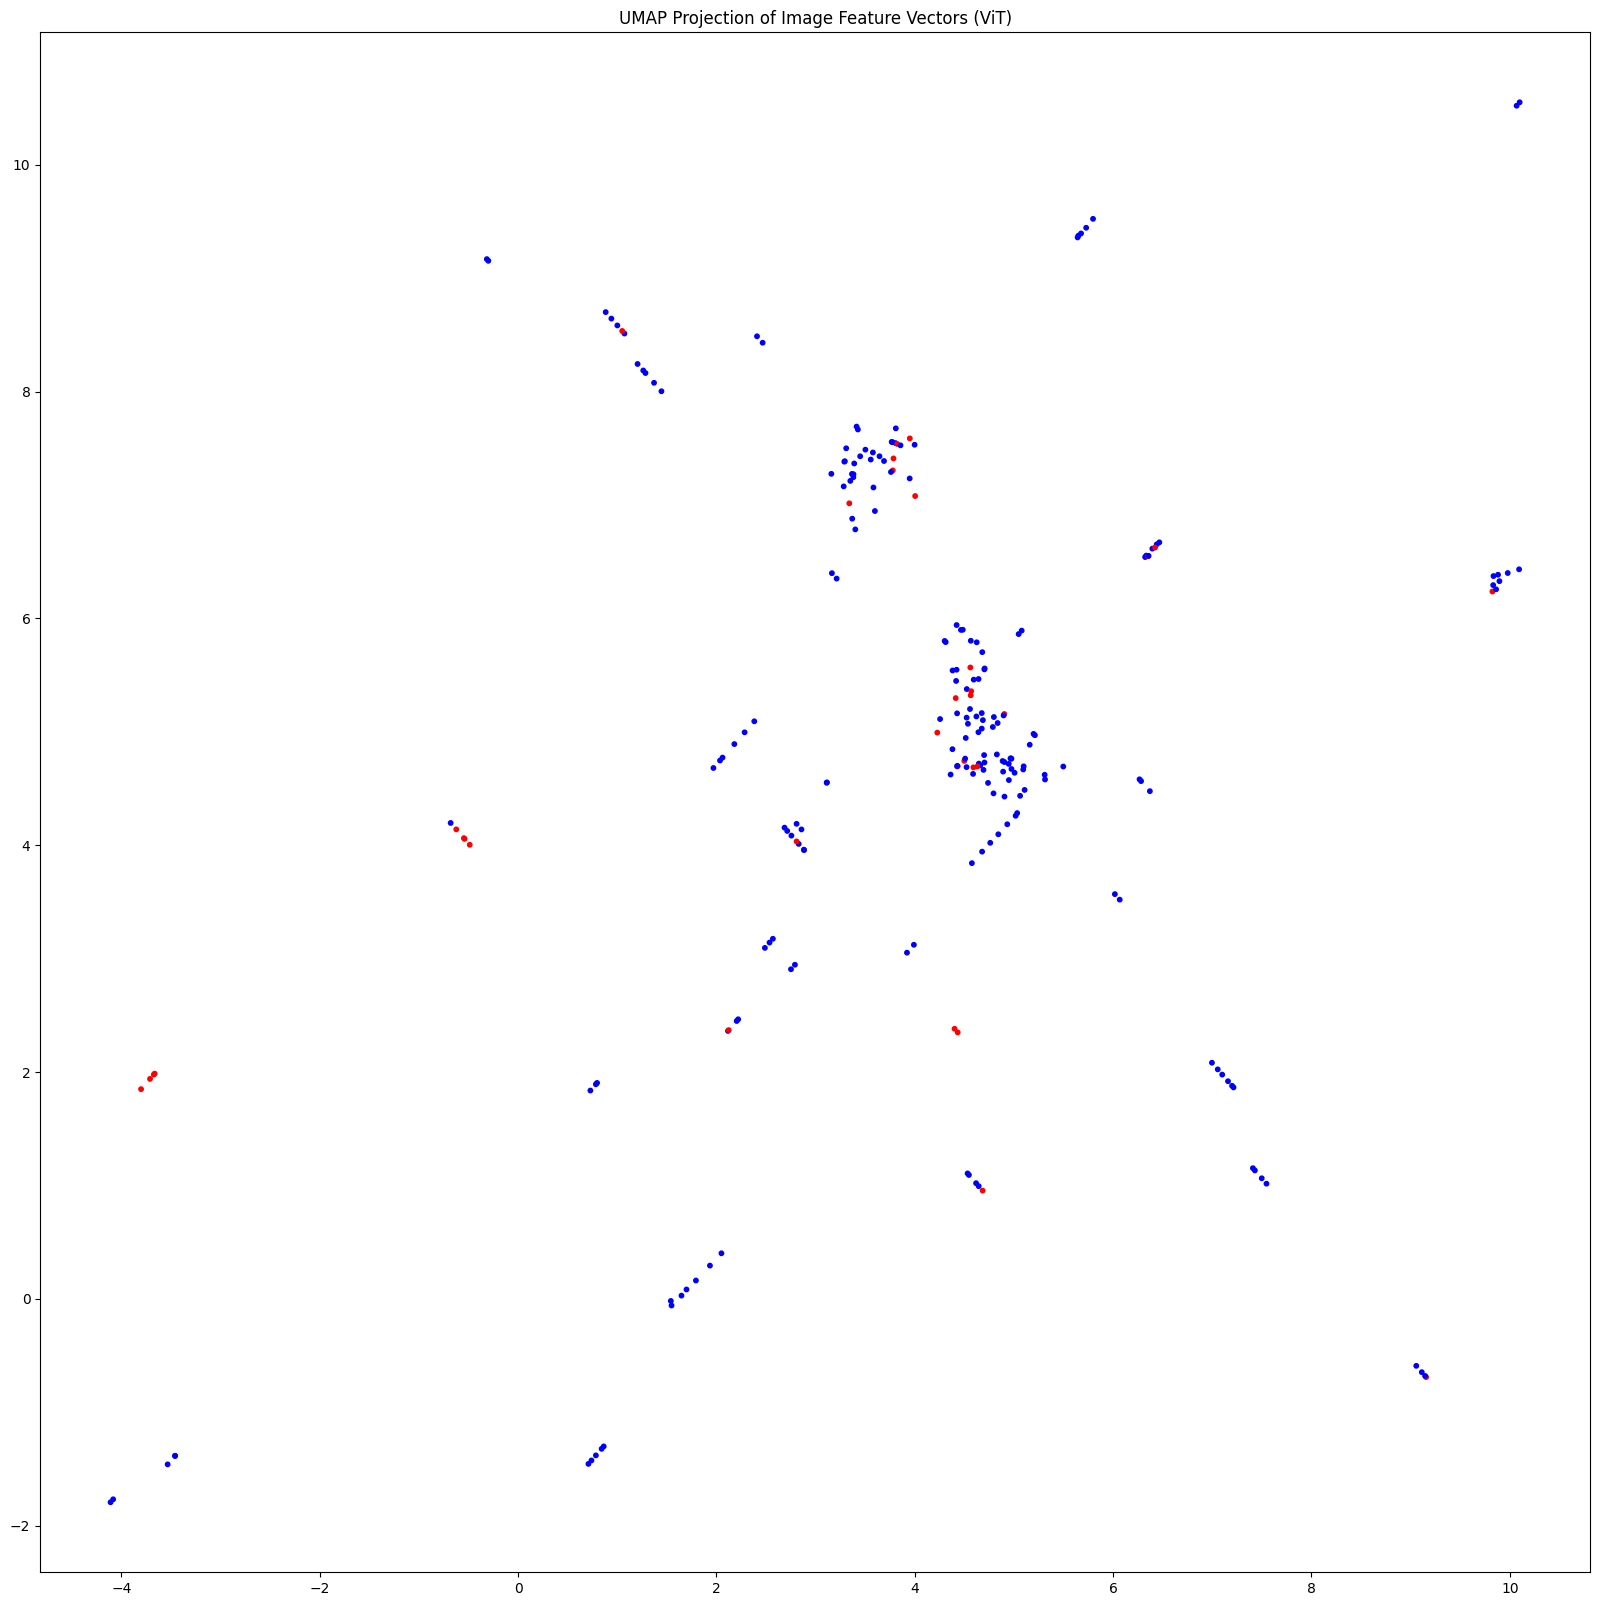

In [61]:
plt.figure(figsize=(20,20))
plt.scatter(results_vit[:, 0], results_vit[:, 1], s=10, c=colors_vit, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (ViT)')

# for i, filename in enumerate(filenames_vit):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vit[i, 0], results_vit[i, 1]), fontsize=8)

plt.show()

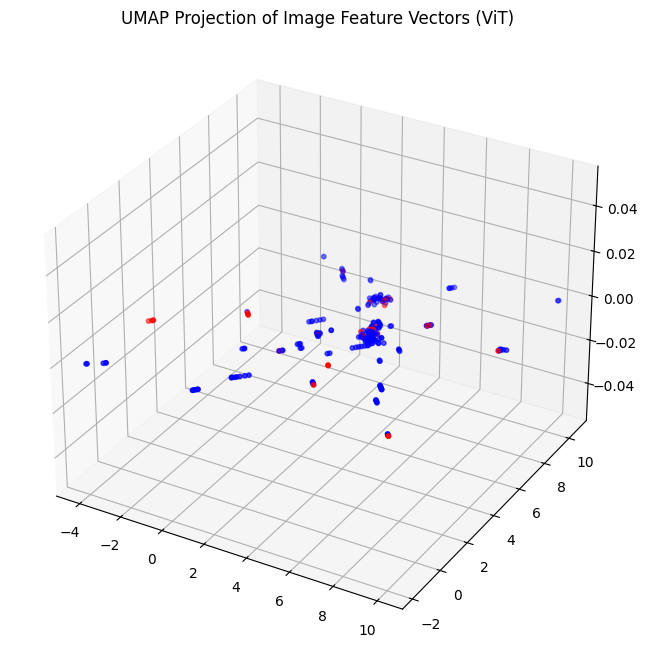

In [62]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_vit[:, 0], results_vit[:, 1], s=10, c=colors_vit, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (ViT)')

# for i, filename in enumerate(filenames_vit):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vit[i, 0], results_vit[i, 1]), fontsize=8)

plt.show()

In [63]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_vit[:, 0], y=results_vit[:, 1], z=results_vit[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_vit, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (ViT)",
)

fig.show()

#### Только для автопортретов

In [64]:
self_portraits_dict_vit = {}

for key in vit_dict:
    if '_a_' in key:
        self_portraits_dict_vit[key] = vit_dict[key]

print(f'Количество авторпортретов: {len(self_portraits_dict_vit)}')

Количество авторпортретов: 7


In [65]:
features_self_portrait_vit = list(self_portraits_dict_vit.values())
features_self_portrait_vit = np.array(features_self_portrait_vit)
print(len(features_self_portrait_vit))

7


In [66]:
filenames_self_portrait_vit = list(self_portraits_dict_vit.keys())
print(len(filenames_self_portrait_vit))

7


In [67]:
umap_vit = umap.UMAP(
            n_neighbors=2,
            n_components=4, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

In [68]:
results = umap_vit.fit_transform(features_self_portrait_vit)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [69]:
colors_vit_self = []
for filename in filenames_self_portrait_vit:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors_vit_self.append('blue')
        elif int(filename.split('_')[0]) < 1819:
            colors_vit_self.append('blue')
        else:
            colors_vit_self.append('red')
            
print(len(colors_vit_self))

7


In [70]:
print(len(colors_vit_self))

7


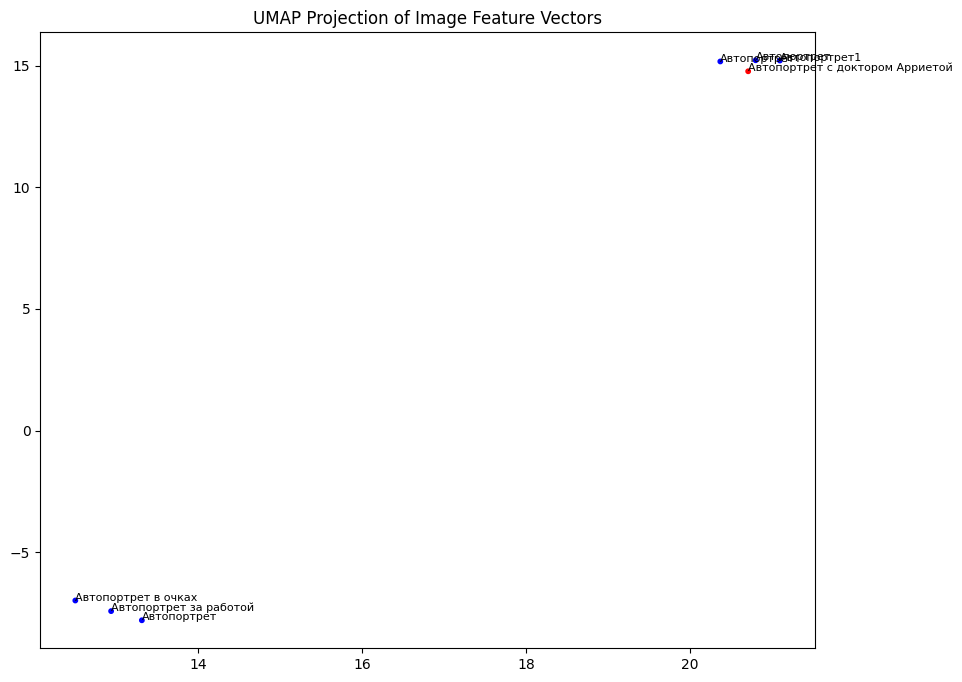

In [71]:
plt.figure(figsize=(10, 8))
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors_vit_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

for i, filename in enumerate(filenames_self_portrait_vit):
    plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

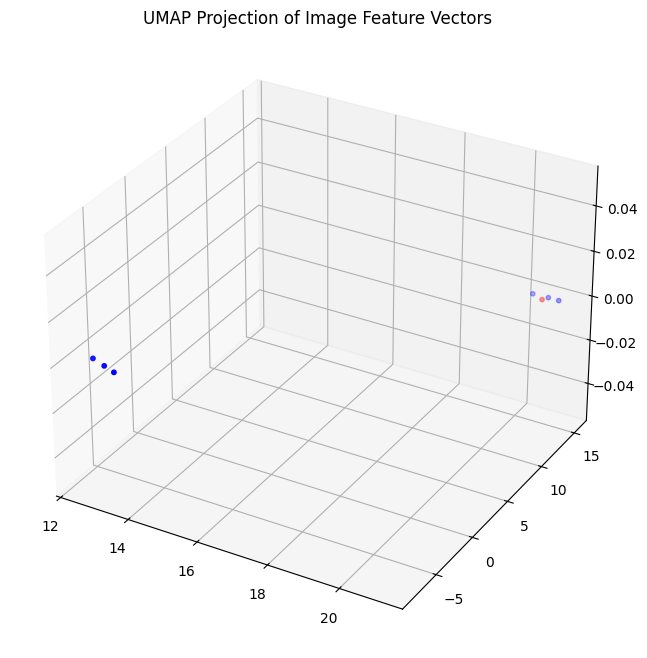

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors_vit_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_self_portrait_vit):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

In [73]:
fig = go.Figure(data=[go.Scatter3d(
    x=results[:, 0], y=results[:, 1], z=results[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_vit_self, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (ViT)",
)

fig.show()

## U-map для векторов CLIP

In [74]:
features_clip = np.array([clip_dict[filename] for filename in clip_dict])
filenames_clip = list(clip_dict.keys())

In [75]:
filenames_pics_clip = [filename.split('/')[-1] for filename in filenames_clip]

In [76]:
umap_clip = umap.UMAP(
            n_neighbors=2,
            n_components=25, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

#### Для всех картинок в датасете

In [77]:
results_clip = umap_clip.fit_transform(features_clip)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [79]:
colors_clip = []
for filename in filenames_clip:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_clip.append('blue')
    elif int(filename.split('_')[0]) < 1819:
        colors_clip.append('blue')
    else:
        colors_clip.append('red') # red - after treatment

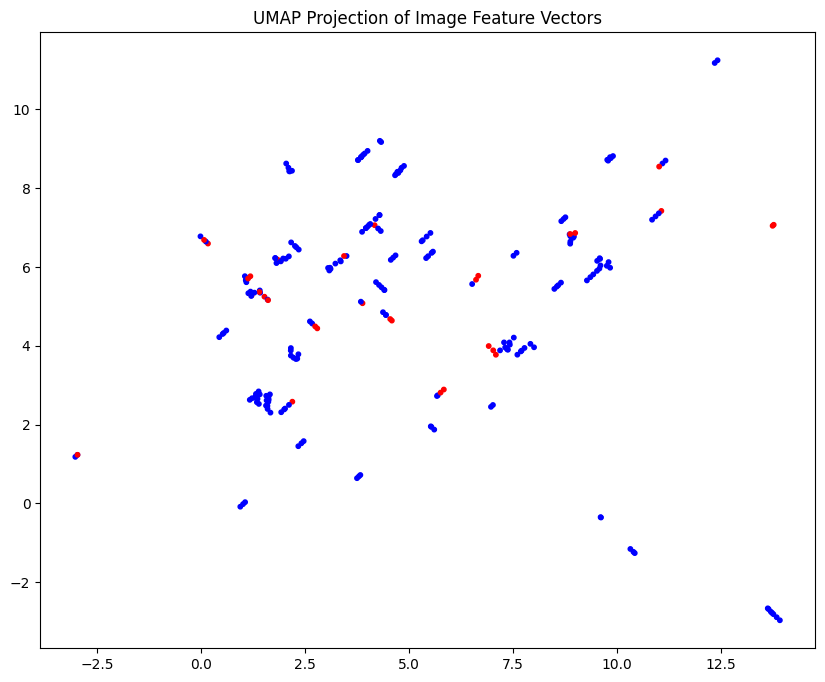

In [80]:
plt.figure(figsize=(10, 8))
plt.scatter(results_clip[:, 0], results_clip[:, 1], s=10, c=colors_clip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_clip[i, 0], results_clip[i, 1]), fontsize=8)

plt.show()

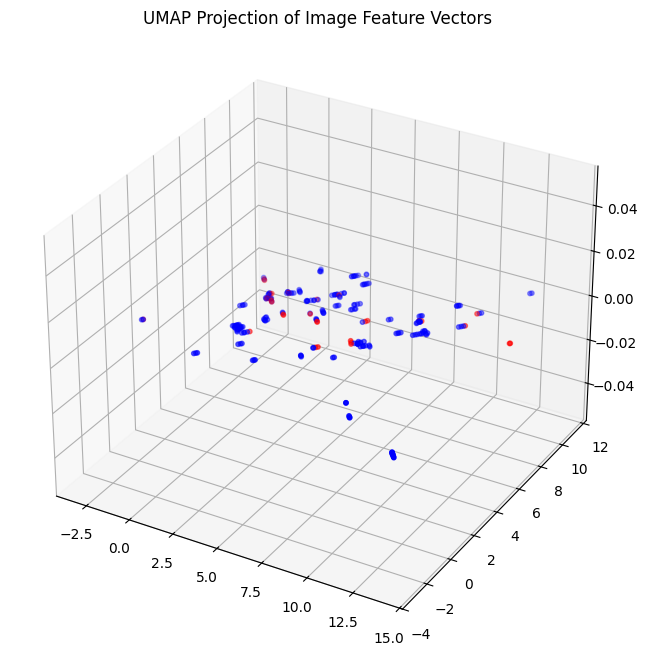

In [81]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_clip[:, 0], results_clip[:, 1], s=10, c=colors_clip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_clip[i, 0], results_clip[i, 1]), fontsize=8)

plt.show()

In [82]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_clip[:, 0], y=results_clip[:, 1], z=results_clip[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_clip, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (ViT)",
)

fig.show()

#### Только для автопортретов

In [83]:
self_portraits_dict_clip = {}

for key in clip_dict:
    if '_a_' in key:
        self_portraits_dict_clip[key] = clip_dict[key]

print(f'Количество авторпортретов: {len(self_portraits_dict_clip)}')

Количество авторпортретов: 7


In [84]:
features_self_portrait_clip = list(self_portraits_dict_clip.values())
features_self_portrait_clip = np.array(features_self_portrait_clip)

In [85]:
filenames_self_portrait_clip = list(self_portraits_dict_clip.keys())

In [87]:
umap_clip = umap.UMAP(
            n_neighbors=2,
            n_components=4, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

In [88]:
results_self_clip = umap_clip.fit_transform(features_self_portrait_clip)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [89]:
colors_clip_self = []
for filename in filenames_self_portrait_clip:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors_clip_self.append('blue')
        elif int(filename.split('_')[0]) < 1819:
            colors_clip_self.append('blue')
        else:
            colors_clip_self.append('red')

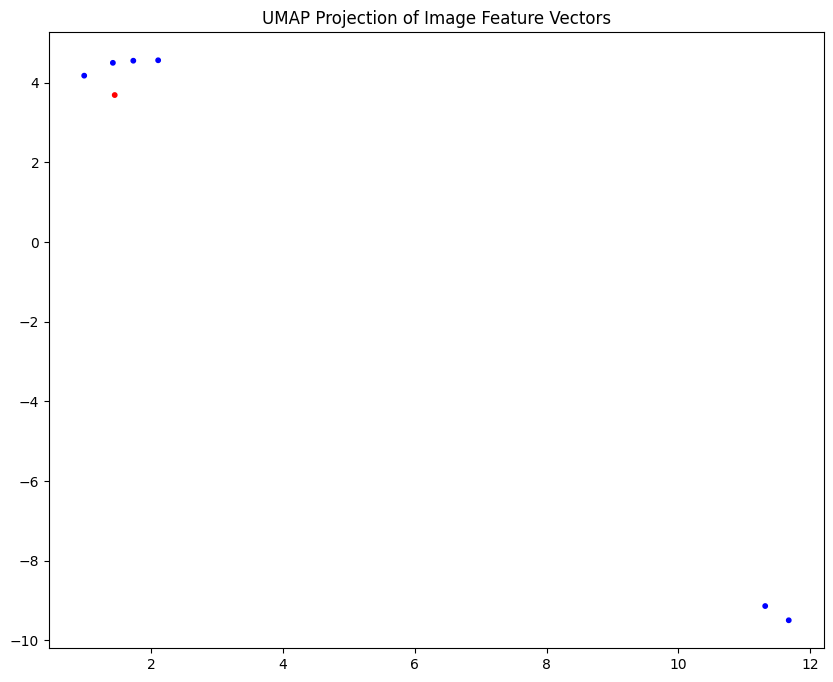

In [90]:
plt.figure(figsize=(10, 8))
plt.scatter(results_self_clip[:, 0], results_self_clip[:, 1], s=10, c=colors_clip_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_self_portrait_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_self_clip[i, 0], results_self_clip[i, 1]), fontsize=8)

plt.show()

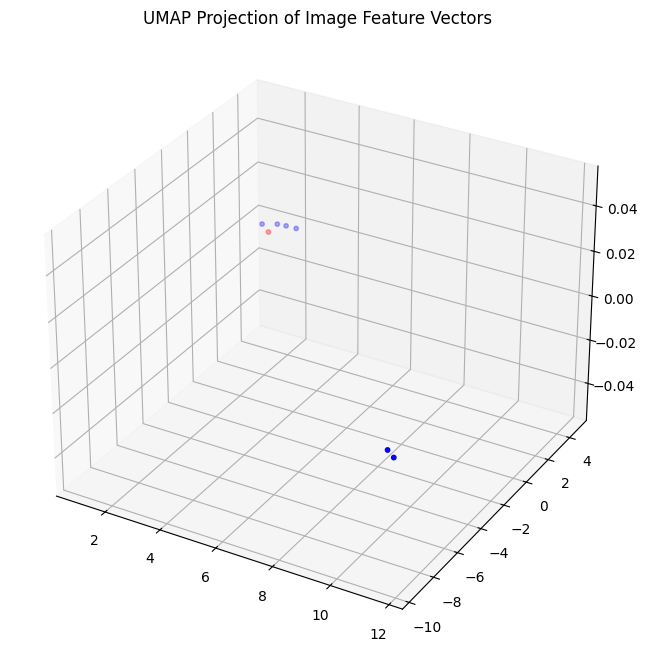

In [91]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_self_clip[:, 0], results_self_clip[:, 1], s=10, c=colors_clip_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_self_portrait_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_self_clip[i, 0], results_self_clip[i, 1]), fontsize=8)

plt.show()

In [92]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_self_clip[:, 0], y=results_self_clip[:, 1], z=results_self_clip[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_clip_self, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (ViT)",
)

fig.show()

## U-map для векторов VGG19

In [93]:
features_vgg19 = np.array([vgg19_dict[filename] for filename in vgg19_dict])
filenames_vgg19 = list(vgg19_dict.keys())

In [94]:
filenames_pics_vgg19 = [filename.split('/')[-1] for filename in filenames_vgg19]

In [95]:
umap_vgg19 = umap.UMAP(
            n_neighbors=2,
            n_components=15, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

#### Для всех картинок в датасете

In [96]:
results_vgg19 = umap_vgg19.fit_transform(features_vgg19)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [98]:
colors_vgg19 = []
for filename in filenames_clip:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_vgg19.append('blue')
    elif int(filename.split('_')[0]) < 1819:
        colors_vgg19.append('blue')
    else:
        colors_vgg19.append('red') # red - after treatment

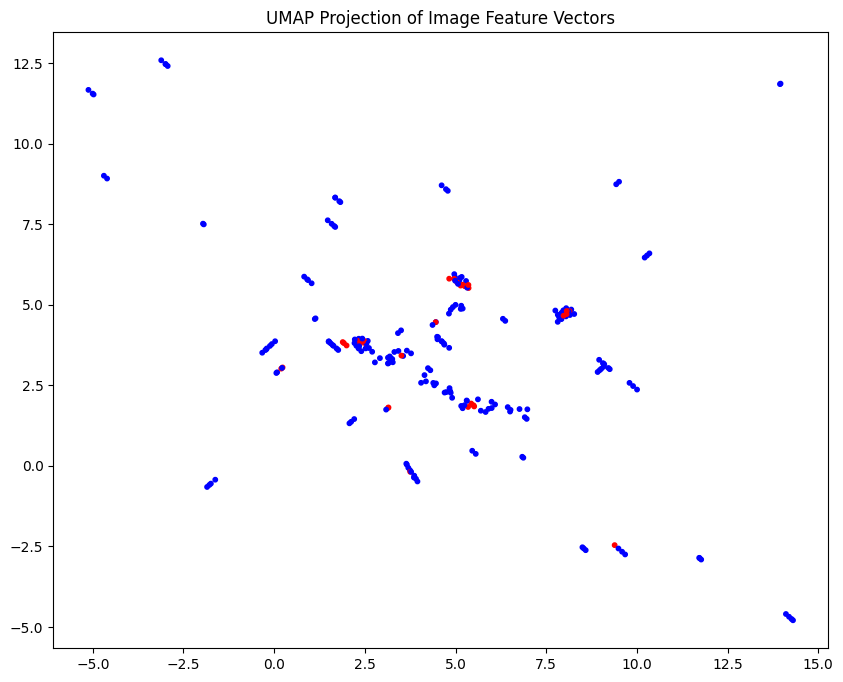

In [99]:
plt.figure(figsize=(10, 8))
plt.scatter(results_vgg19[:, 0], results_vgg19[:, 1], s=10, c=colors_vgg19, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_vgg19):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vgg19[i, 0], results_vgg19[i, 1]), fontsize=8)

plt.show()

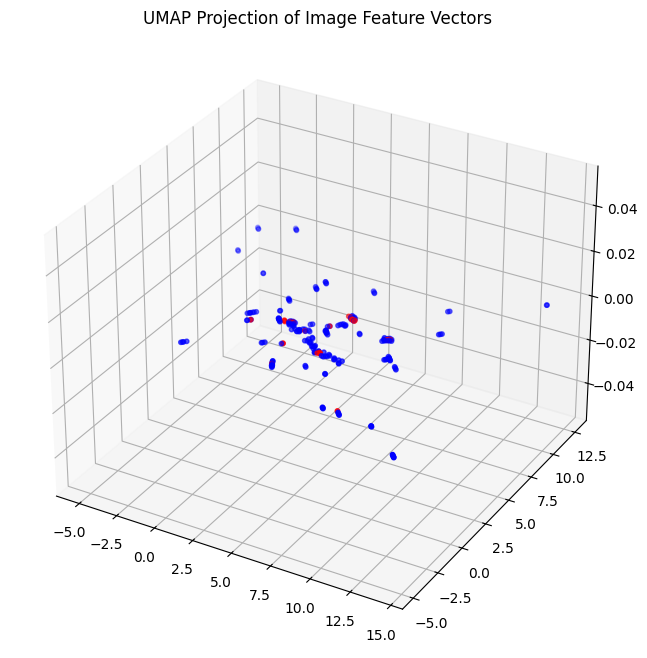

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_vgg19[:, 0], results_vgg19[:, 1], s=10, c=colors_vgg19, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_vgg19):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vgg19[i, 0], results_vgg19[i, 1]), fontsize=8)

plt.show()

In [101]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_vgg19[:, 0], y=results_vgg19[:, 1], z=results_vgg19[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_vgg19, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (VGG19)",
)

fig.show()

#### Только для автопортретов

In [102]:
self_portraits_dict_vgg19 = {}

for key in vgg19_dict:
    if '_a_' in key:
        self_portraits_dict_vgg19[key] = clip_dict[key]

print(f'Количество авторпортретов: {len(self_portraits_dict_vgg19)}')

Количество авторпортретов: 7


In [103]:
features_self_portrait_vgg19 = list(self_portraits_dict_vgg19.values())
features_self_portrait_vgg19 = np.array(features_self_portrait_vgg19)

In [104]:
filenames_self_portrait_vgg19 = list(self_portraits_dict_vgg19.keys())

In [105]:
umap_vgg19 = umap.UMAP(
            n_neighbors=2,
            n_components=4, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

In [106]:
results_self_vgg19 = umap_vgg19.fit_transform(features_self_portrait_vgg19)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [107]:
colors_vgg19_self = []
for filename in filenames_self_portrait_vgg19:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors_vgg19_self.append('blue')
        elif int(filename.split('_')[0]) < 1819:
            colors_vgg19_self.append('blue')
        else:
            colors_vgg19_self.append('red')

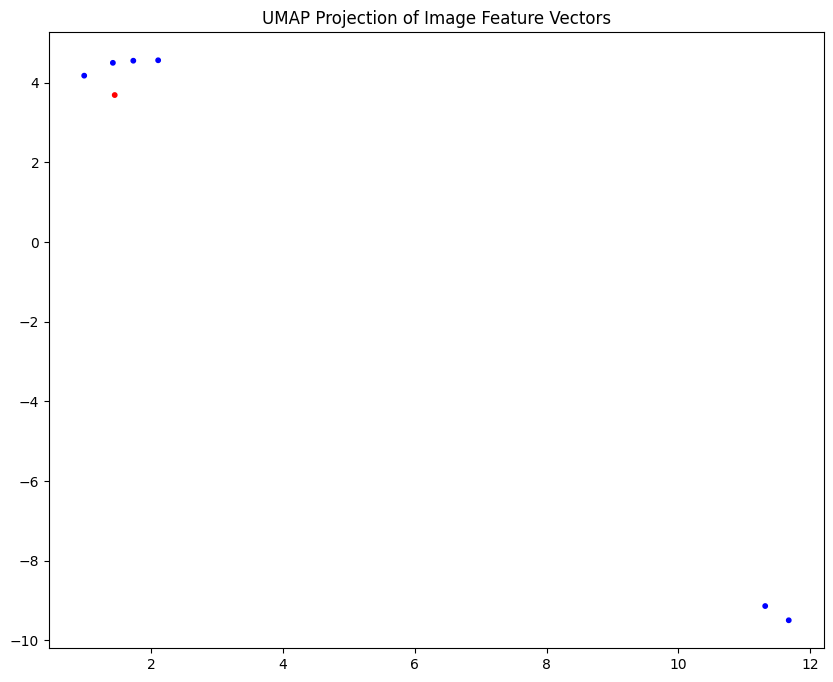

In [108]:
plt.figure(figsize=(10, 8))
plt.scatter(results_self_vgg19[:, 0], results_self_vgg19[:, 1], s=10, c=colors_vgg19_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_self_portrait_vgg19):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_self_vgg19[i, 0], results_self_vgg19[i, 1]), fontsize=8)

plt.show()

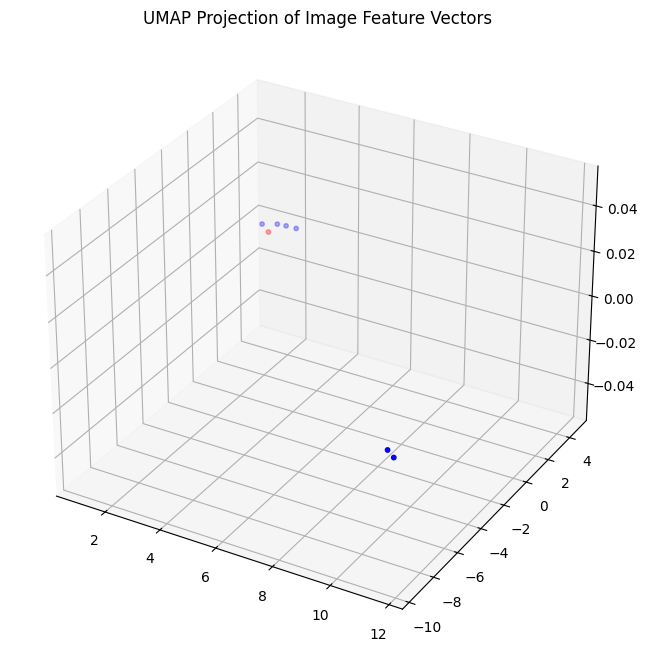

In [109]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_self_vgg19[:, 0], results_self_vgg19[:, 1], s=10, c=colors_vgg19_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_self_portrait_vgg19):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_self_vgg19[i, 0], results_self_vgg19[i, 1]), fontsize=8)

plt.show()

In [110]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_self_vgg19[:, 0], y=results_self_vgg19[:, 1], z=results_self_vgg19[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_vgg19_self, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (VGG19)",
)

fig.show()